# Naive Bayes

Este notebook explica el algoritmo Naive Bayes, un clasificador probabilístico basado en el teorema de Bayes.

## ¿Qué es Naive Bayes?

Naive Bayes es un algoritmo de clasificación basado en el teorema de Bayes con el supuesto de "naive" (ingenuo) de independencia entre las características. A pesar de esta simplificación, funciona sorprendentemente bien en muchos problemas del mundo real.

## Conceptos Fundamentales

- **Teorema de Bayes**: P(A|B) = P(B|A) × P(A) / P(B)
- **Supuesto de independencia**: Las características son independientes entre sí
- **Probabilidad a priori**: P(clase) - probabilidad de cada clase
- **Probabilidad condicional**: P(característica|clase) - probabilidad de una característica dado una clase
- **Probabilidad a posteriori**: P(clase|características) - probabilidad de una clase dado las características


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


## Teorema de Bayes

El teorema de Bayes nos permite calcular la probabilidad de una clase dado un conjunto de características:

$$P(C|X) = \frac{P(X|C) \times P(C)}{P(X)}$$

Donde:
- $P(C|X)$: Probabilidad a posteriori (clase dado características)
- $P(X|C)$: Probabilidad condicional (características dado clase)
- $P(C)$: Probabilidad a priori (clase)
- $P(X)$: Probabilidad de las características (normalización)

## Supuesto Naive (Ingenuo)

El supuesto de independencia permite simplificar el cálculo:

$$P(X|C) = P(x_1|C) \times P(x_2|C) \times ... \times P(x_n|C)$$

Esto significa que asumimos que las características son independientes entre sí, lo cual rara vez es cierto en la práctica, pero el algoritmo funciona bien de todos modos.


In [ ]:
class NaiveBayesClassifier:
    """Implementación básica de Naive Bayes para clasificación"""
    
    def __init__(self):
        self.classes = None
        self.class_priors = {}
        self.class_likelihoods = {}
    
    def fit(self, X, y):
        """Entrena el clasificador Naive Bayes"""
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # Calcular probabilidades a priori
        for c in self.classes:
            self.class_priors[c] = np.sum(y == c) / n_samples
        
        # Calcular probabilidades condicionales (likelihoods)
        for c in self.classes:
            X_c = X[y == c]
            self.class_likelihoods[c] = {}
            
            for feature_idx in range(n_features):
                feature_values = X_c[:, feature_idx]
                # Asumir distribución normal (Gaussian)
                mean = np.mean(feature_values)
                std = np.std(feature_values)
                self.class_likelihoods[c][feature_idx] = {'mean': mean, 'std': std}
    
    def gaussian_pdf(self, x, mean, std):
        """Función de densidad de probabilidad gaussiana"""
        if std == 0:
            return 1.0 if x == mean else 0.0
        return (1.0 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    
    def predict(self, X):
        """Predice las clases para los puntos en X"""
        predictions = []
        
        for x in X:
            posteriors = {}
            
            for c in self.classes:
                # Iniciar con la probabilidad a priori
                posterior = np.log(self.class_priors[c])
                
                # Multiplicar por las probabilidades condicionales (usando log para evitar underflow)
                for feature_idx in range(len(x)):
                    mean = self.class_likelihoods[c][feature_idx]['mean']
                    std = self.class_likelihoods[c][feature_idx]['std']
                    likelihood = self.gaussian_pdf(x[feature_idx], mean, std)
                    # Usar log para evitar problemas numéricos
                    if likelihood > 0:
                        posterior += np.log(likelihood)
                
                posteriors[c] = posterior
            
            # Clase con mayor probabilidad a posteriori
            predicted_class = max(posteriors, key=posteriors.get)
            predictions.append(predicted_class)
        
        return np.array(predictions)


## Tipos de Naive Bayes

Existen diferentes variantes según el tipo de datos:

1. **Gaussian Naive Bayes**: Para características continuas (distribución normal)
2. **Multinomial Naive Bayes**: Para conteos/discretos (texto, clasificación de documentos)
3. **Bernoulli Naive Bayes**: Para características binarias (presencia/ausencia)


In [3]:
# Cargar dataset de iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Usar nuestra implementación
nb_custom = NaiveBayesClassifier()
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Precisión con implementación propia: {accuracy_custom:.4f}")

# Usar scikit-learn (Gaussian Naive Bayes)
nb_sklearn = GaussianNB()
nb_sklearn.fit(X_train, y_train)
y_pred_sklearn = nb_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Precisión con scikit-learn (GaussianNB): {accuracy_sklearn:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_sklearn, target_names=iris.target_names))


Precisión con implementación propia: 0.9778
Precisión con scikit-learn (GaussianNB): 0.9778

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



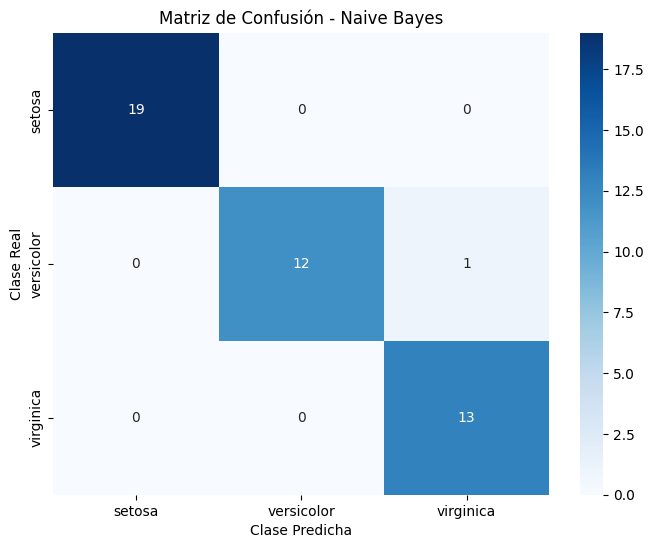

In [4]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Matriz de Confusión - Naive Bayes')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()


## Comparación de Variantes de Naive Bayes


GaussianNB: 0.9778
MultinomialNB: 0.9556
BernoulliNB: 0.2889


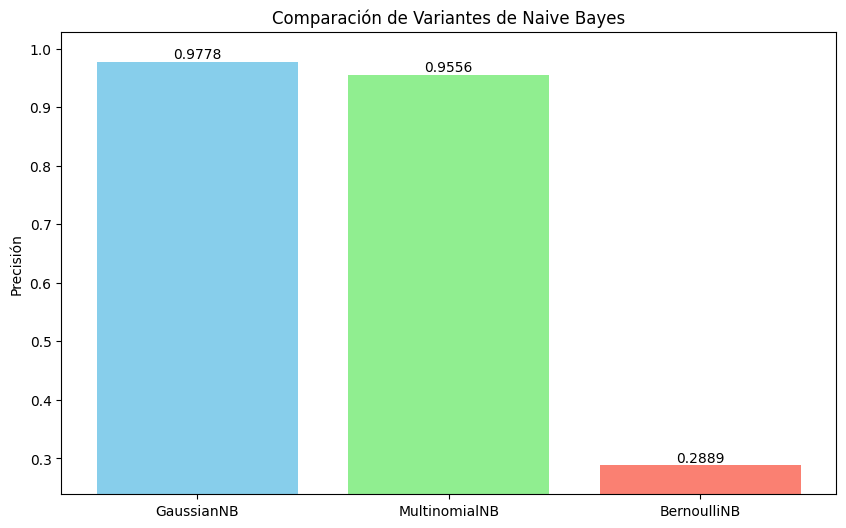

In [5]:
# Comparar diferentes variantes
classifiers = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results[name] = score
    print(f"{name}: {score:.4f}")

# Visualizar
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Precisión')
plt.title('Comparación de Variantes de Naive Bayes')
plt.ylim([min(results.values()) - 0.05, max(results.values()) + 0.05])
for name, score in results.items():
    plt.text(name, score, f'{score:.4f}', ha='center', va='bottom')
plt.show()


## Ejemplo: Clasificación de Texto

Naive Bayes es especialmente útil para clasificación de texto:


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Ejemplo simple de clasificación de texto
texts = [
    "me encanta este producto",
    "odio este servicio",
    "excelente calidad",
    "muy malo",
    "recomiendo totalmente",
    "no lo compren",
    "súper bueno",
    "terrible experiencia"
]

labels = [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = positivo, 0 = negativo

# Convertir texto a vectores de características
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(texts)

# Entrenar Naive Bayes
nb_text = MultinomialNB()
nb_text.fit(X_text, labels)

# Predecir nuevos textos
new_texts = ["me gusta mucho", "es horrible"]
X_new = vectorizer.transform(new_texts)
predictions = nb_text.predict(X_new)

for text, pred in zip(new_texts, predictions):
    sentiment = "Positivo" if pred == 1 else "Negativo"
    print(f"'{text}' -> {sentiment}")


'me gusta mucho' -> Positivo
'es horrible' -> Negativo


## Ventajas y Desventajas

**Ventajas:**
- Simple y rápido de entrenar
- Funciona bien con pocos datos
- Maneja múltiples clases naturalmente
- No es sensible a características irrelevantes
- Excelente para clasificación de texto

**Desventajas:**
- Supuesto de independencia rara vez se cumple en la práctica
- Puede tener problemas con datos continuos si no se asume distribución correcta
- Sensible a características correlacionadas

## Aplicaciones

- Clasificación de texto (spam, análisis de sentimientos)
- Sistemas de recomendación
- Diagnóstico médico
- Filtrado de contenido
- Clasificación de documentos
